# Xử lý và tóm tắt dữ liệu 

Để có thể hiểu được dữ liệu, trước hết chúng ta cần biết cách đọc và xử lý dữ liệu trước. Sau đó chúng ta có thể tìm hiểu những đặc điểm cơ bản của dữ liệu thông qua các số liệu thống kê và các biểu đồ trực quan. Trong tài liệu này, chúng ta sẽ sử dụng hai thư viện phổ biến trong Python là Pandas và Seaborn để thực hiện các nhiệm vụ này.

Tà liệu này sẽ nói về những điểm sau:

- Pandas cơ bản
- Xử lý dữ liệu
- Tóm tắt dữ liệu và trực quan hóa


---

## THAM KHẢO
**Part 1: Pandas Fundamentals with Synthetic Data (50 minutes)**

-   DataFrame and Series creation
-   Basic data inspection methods (.head(), .info(), .describe())
-   Data selection and filtering
-   Working with synthetic datasets for consistency

**Part 2: Data Manipulation (50 minutes)**

-   Handling missing values (drop/fill basic approaches)
-   Grouping and aggregation
-   **Merging and joining DataFrames** (leveraging SQL experience)
-   Creating new variables

**Part 3: Summary Statistics and Seaborn Introduction (50 minutes)**

-   Descriptive statistics with pandas
-   **Introduction to Seaborn** with built-in datasets
-   Statistical plots: histograms, boxplots, scatter plots
-   Correlation analysis and visualization

--- 

## 1. PANDAS

`Pandas` là một thư viện cơ bản dùng để phân tích dữ liệu. `Pandas` cho phép người dùng đọc, ghi dữ liệu từ file và cung cấp những chức năng để việc phân tích dữ liệu được dễ dàng.

Bạn có thể xem cheatshet (bảng tóm tắt) các hàm của Pandas ở đây [Pandas-cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

Trước khi sử dụng chúng ta cần phải tải thư viện `Pandas` và `Numpy`

In [4]:
import pandas as pd
import numpy as np

### 1.1 Series và DataFrame

Có hai cấu trúc dữ liệu tronng Pandas đó là: `Series` and `DataFrame`.

**`Series`** giống như list trong Python, là cấu trúc mảng một chiều dùng để chứa dữ liệu. `Series` sử dụng nhãn (label) hoặc chỉ mục (index) để truy cập các phần tử.

In [5]:
x = pd.Series([34, 23, -5, 0])
print(x)

0    34
1    23
2    -5
3     0
dtype: int64


**`DataFrame`** giống như một bảng trong Excel với các hàng và các cột.

Mộ số cách tạo DataFrame:

In [6]:
# Create a DataFrame from a dictionary
data = {'name': ['Mary', 'David', 'Jack', 'John', 'Robin'],
        'state': ['VIC', 'NSW', 'VIC', 'SA', 'QLD'],
        'birthyear': [1980, 1992, 2000, 1980, 1995]}
df = pd.DataFrame(data)
df

,name,state,birthyear
0,Mary,VIC,1980
1,David,NSW,1992
2,Jack,VIC,2000
3,John,SA,1980
4,Robin,QLD,1995


In [7]:
# Create an empty DataFrame and add rows
df = pd.DataFrame(columns=['name', 'state', 'birthyear'])
df.loc[len(df)] = ['Mary', 'VIC', 1980]
df.loc[len(df)] = ['David', 'NSW', 1992]

df

,name,state,birthyear
0,Mary,VIC,1980
1,David,NSW,1992


### 1.2 Tạo DataFrame để lưu dữ liệu

Trong phần này ta sẽ tạo ngẫu nhiên một bộ dữ liệu về thông tin sinh viên và lưu vào một đối tượng DataFrame.

In [8]:
np.random.seed(42)  # For reproducible results

students_data = {
    'student_id': [f'STU{i:03d}' for i in range(1, 21)],
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace', 'Henry',
             'Ivy', 'Jack', 'Kate', 'Liam', 'Maya', 'Noah', 'Olivia', 'Paul',
             'Quinn', 'Ruby', 'Sam', 'Tina'],
    'age': np.random.randint(18, 25, 20),
    'major': np.random.choice(['Statistics', 'Mathematics', 'Computer Science', 'Engineering'], 20),
    'gpa': np.round(np.random.uniform(2.5, 4.0, 20), 2),
    'year': np.random.choice([1, 2, 3, 4], 20),
    'credits': np.random.randint(12, 20, 20)
}

df_students = pd.DataFrame(students_data)

print("Created student dataset:")
print(df_students.head())
print(f"\nDataset shape: {df_students.shape}")

Created student dataset:
  student_id     name  age        major   gpa  year  credits
0     STU001    Alice   24  Mathematics  3.96     3       13
1     STU002      Bob   21  Mathematics  2.85     2       17
2     STU003  Charlie   22  Mathematics  2.64     1       15
3     STU004    Diana   24  Engineering  3.43     4       17
4     STU005      Eve   20  Engineering  3.07     2       18

Dataset shape: (20, 7)


### 1.3 Hiểu dữ liệu

Tìm hiểu những thông tin cơ bản về dữ liệu đang chứa trong đối tượng DataFrame.

In [7]:
print("\n=== .head() and .tail() ===")
print("First 3 rows:")
print(df_students.head(3))
print("\nLast 3 rows:")
print(df_students.tail(3))

print("=== .info() ===")
print(df_students.info())

print("\n=== Data Types ===")
print(df_students.dtypes)

print("\n=== Column Names ===")
print(df_students.columns.tolist())

print("\n=== Index ===")
print(f"Index: {df_students.index}")


=== .head() and .tail() ===
First 3 rows:
  student_id     name  age        major   gpa  year  credits
0     STU001    Alice   24  Mathematics  3.96     3       13
1     STU002      Bob   21  Mathematics  2.85     2       17
2     STU003  Charlie   22  Mathematics  2.64     1       15

Last 3 rows:
   student_id  name  age        major   gpa  year  credits
17     STU018  Ruby   22  Mathematics  3.52     2       13
18     STU019   Sam   19  Engineering  3.41     4       18
19     STU020  Tina   21  Engineering  3.75     2       16
=== .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  20 non-null     object 
 1   name        20 non-null     object 
 2   age         20 non-null     int32  
 3   major       20 non-null     object 
 4   gpa         20 non-null     float64
 5   year        20 non-null     int32  
 6   credits     

Hàm `describe()` cung cấp các thông tin thống kê mô tả cho từng cột. Lưu ý rằng: hàm `describe()` này không bao gồm các giá trị *null*.

In [8]:
print("\n=== .describe() ===")
print(df_students.describe())


=== .describe() ===
             age        gpa   year    credits
count  20.000000  20.000000  20.00  20.000000
mean   21.500000   3.268500   2.50  16.600000
std     1.670172   0.469235   1.00   2.112619
min    19.000000   2.520000   1.00  12.000000
25%    20.000000   2.857500   2.00  15.750000
50%    21.500000   3.270000   2.00  17.000000
75%    22.250000   3.577500   3.25  18.000000
max    24.000000   3.970000   4.00  19.000000


In [9]:
# Display all statistics including categorical data
print("\n=== .describe() ===")
df_students.describe(include='all')


=== .describe() ===


,student_id,name,age,major,gpa,year,credits
count,20,20,20.000000,20,20.000000,20.00,20.000000
unique,20,20,NaN,4,NaN,NaN,NaN
top,STU001,Alice,NaN,Mathematics,NaN,NaN,NaN
freq,1,1,NaN,6,NaN,NaN,NaN
mean,NaN,NaN,21.500000,NaN,3.268500,2.50,16.600000
std,NaN,NaN,1.670172,NaN,0.469235,1.00,2.112619
min,NaN,NaN,19.000000,NaN,2.520000,1.00,12.000000
25%,NaN,NaN,20.000000,NaN,2.857500,2.00,15.750000
50%,NaN,NaN,21.500000,NaN,3.270000,2.00,17.000000
75%,NaN,NaN,22.250000,NaN,3.577500,3.25,18.000000


**Kiểm tra dữ liệu bị thiếu (missing data)**

In [10]:
print(df_students.isnull().sum())

student_id    0
name          0
age           0
major         0
gpa           0
year          0
credits       0
dtype: int64


### 1.4 Lọc dữ liệu


In [11]:
# Column selection
print("=== Column Selection ===")
print("Single column (returns Series):")
print(df_students['name'].head())

print("\nMultiple columns (returns DataFrame):")
print(df_students[['name', 'gpa', 'major']].head())

=== Column Selection ===
Single column (returns Series):
0      Alice
1        Bob
2    Charlie
3      Diana
4        Eve
Name: name, dtype: object

Multiple columns (returns DataFrame):
      name   gpa        major
0    Alice  3.96  Mathematics
1      Bob  2.85  Mathematics
2  Charlie  2.64  Mathematics
3    Diana  3.43  Engineering
4      Eve  3.07  Engineering


In [12]:
# Row selection with .loc and .iloc
print("\n=== Row Selection ===")
print("Using .loc (label-based):")
print(df_students.loc[0:2, ['name', 'gpa']])

print("\nUsing .iloc (position-based):")
print(df_students.iloc[0:3, 1:4])


=== Row Selection ===
Using .loc (label-based):
      name   gpa
0    Alice  3.96
1      Bob  2.85
2  Charlie  2.64

Using .iloc (position-based):
      name  age        major
0    Alice   24  Mathematics
1      Bob   21  Mathematics
2  Charlie   22  Mathematics


In [13]:
# Boolean filtering
print("\n=== Boolean Filtering ===")

# Students with high GPA
high_gpa_students = df_students[df_students['gpa'] >= 3.5]
print(f"Students with GPA >= 3.5 ({len(high_gpa_students)} students):")
print(high_gpa_students[['name', 'gpa', 'major']])

# Multiple conditions
engineering_seniors = df_students[
    (df_students['major'] == 'Engineering') & 
    (df_students['year'] >= 3)
]
print(f"\nEngineering seniors ({len(engineering_seniors)} students):")
print(engineering_seniors[['name', 'year', 'gpa']])

# Using .query() method (alternative syntax)
print("\n=== Using .query() Method ===")
query_result = df_students.query('gpa > 3.0 and age < 22')
print(f"Young high-achievers ({len(query_result)} students):")
print(query_result[['name', 'age', 'gpa']])


=== Boolean Filtering ===
Students with GPA >= 3.5 (7 students):
     name   gpa        major
0   Alice  3.96  Mathematics
5   Frank  3.97   Statistics
7   Henry  3.79  Engineering
8     Ivy  3.52  Mathematics
11   Liam  3.91  Engineering
17   Ruby  3.52  Mathematics
19   Tina  3.75  Engineering

Engineering seniors (2 students):
     name  year   gpa
3   Diana     4  3.43
18    Sam     4  3.41

=== Using .query() Method ===
Young high-achievers (7 students):
    name  age   gpa
4    Eve   20  3.07
8    Ivy   19  3.52
9   Jack   20  3.18
11  Liam   20  3.91
12  Maya   20  3.34
18   Sam   19  3.41
19  Tina   21  3.75


### 1.5 Thêm, Cập nhật cột

Giả sử ta muốn thêm hai cột mới:
- `gpa_category`: phân loại sinh viên dựa trên điểm trung bình `gpa`
- `is_senior`: đánh dấu sinh viên năm cuối (năm 3 và năm 4)
- `credits_per_year`: tính số tín chỉ trung bình mỗi năm (giả sử mỗi sinh viên phải hoàn thành 24 tín chỉ để tốt nghiệp)

In [14]:
# Create new columns
df_students['gpa_category'] = pd.cut(df_students['gpa'], 
                                    bins=[0, 2.5, 3.0, 3.5, 4.0], 
                                    labels=['Low', 'Fair', 'Good', 'Excellent'])

df_students['is_senior'] = df_students['year'] >= 3

---

## 2. XỬ LÝ DỮ LIỆU
### 2.1 Xử lý dữ liệu bị thiếu

Trong thực tế, dữ liệu thường không đầy đủ và có thể có những giá trị bị thiếu (missing values). Việc xử lý dữ liệu bị thiếu là một bước quan trọng trong quá trình phân tích dữ liệu. Trong ví dụ này, ta sẽ xem xét một bộ dữ liệu về điểm số của sinh viên với một số giá trị bị thiếu.

In [20]:
print("\n--- Handling Missing Values ---")

# Create a dataset with missing values
grades_data = {
    'student_id': [f'STU{i:03d}' for i in range(1, 16)],
    'math_score': [85, 92, None, 88, 95, 78, None, 89, 84, 91, 87, None, 82, 90, 86],
    'english_score': [78, None, 85, 82, 88, None, 79, 87, None, 83, 86, 81, 84, None, 89],
    'science_score': [90, 88, 87, None, 92, 85, 88, None, 86, 89, None, 84, 87, 91, 88],
    'attendance': [95, 88, 92, 85, None, 78, 90, 87, None, 94, 89, 82, None, 91, 86]
}

df_grades = pd.DataFrame(grades_data)
print("Dataset with missing values:")
print(df_grades)


--- Handling Missing Values ---
Dataset with missing values:
   student_id  math_score  english_score  science_score  attendance
0      STU001        85.0           78.0           90.0        95.0
1      STU002        92.0            NaN           88.0        88.0
2      STU003         NaN           85.0           87.0        92.0
3      STU004        88.0           82.0            NaN        85.0
4      STU005        95.0           88.0           92.0         NaN
5      STU006        78.0            NaN           85.0        78.0
6      STU007         NaN           79.0           88.0        90.0
7      STU008        89.0           87.0            NaN        87.0
8      STU009        84.0            NaN           86.0         NaN
9      STU010        91.0           83.0           89.0        94.0
10     STU011        87.0           86.0            NaN        89.0
11     STU012         NaN           81.0           84.0        82.0
12     STU013        82.0           84.0           87.

In [21]:
print("\nMissing value summary:")
print(df_grades.isnull().sum())
print(f"\nPercentage of missing values:")
print(df_grades.isnull().sum() / len(df_grades) * 100)


Missing value summary:
student_id       0
math_score       3
english_score    4
science_score    3
attendance       3
dtype: int64

Percentage of missing values:
student_id        0.000000
math_score       20.000000
english_score    26.666667
science_score    20.000000
attendance       20.000000
dtype: float64


In [22]:
# Check missing value patterns
print("\nRows with any missing values:")
print(df_grades[df_grades.isnull().any(axis=1)])


Rows with any missing values:
   student_id  math_score  english_score  science_score  attendance
1      STU002        92.0            NaN           88.0        88.0
2      STU003         NaN           85.0           87.0        92.0
3      STU004        88.0           82.0            NaN        85.0
4      STU005        95.0           88.0           92.0         NaN
5      STU006        78.0            NaN           85.0        78.0
6      STU007         NaN           79.0           88.0        90.0
7      STU008        89.0           87.0            NaN        87.0
8      STU009        84.0            NaN           86.0         NaN
10     STU011        87.0           86.0            NaN        89.0
11     STU012         NaN           81.0           84.0        82.0
12     STU013        82.0           84.0           87.0         NaN
13     STU014        90.0            NaN           91.0        91.0


Vậy đối với dữ liệu bị thiếu, ta phải làm gì? Tùy theo mục tiêu phân tích và tính chất của dữ liệu, ta có thể áp dụng các chiến lược khác nhau để xử lý dữ liệu bị thiếu. Nhìn chung sẽ có hai cách tiếp cận chính:

**Chiến luợc xử lý dữ liệu bị thiếu**:
- Loại bỏ giá trị bị thiếu: loại bỏ các hàng hoặc cột có giá trị bị thiếu
- Thay thế giá trị bị thiếu bằng một giá trị cụ thể: thay thế giá trị bị thiếu bằng một giá trị cụ thể (như 0 hoặc -1), mean, median, mode hoặc giá trị lân cận.

In [23]:
# Basic missing value handling strategies
print("\n=== Basic Missing Value Strategies ===")

# Strategy 1: Drop rows with missing values
df_drop_rows = df_grades.dropna()
print(f"Original rows: {len(df_grades)}, After dropping rows: {len(df_drop_rows)}")


=== Basic Missing Value Strategies ===
Original rows: 15, After dropping rows: 3


In [24]:
# Strategy 2: Drop columns with missing values
df_drop_cols = df_grades.dropna(axis=1)
print(f"Original columns: {df_grades.shape[1]}, After dropping columns: {df_drop_cols.shape[1]}")

Original columns: 5, After dropping columns: 1


In [25]:
# Strategy 3: Fill with mean
df_fill_mean = df_grades.copy()
for col in ['math_score', 'english_score', 'science_score', 'attendance']:
    df_fill_mean[col] = df_fill_mean[col].fillna(df_fill_mean[col].mean())

print("\nDataset after filling with mean:")
print(df_fill_mean.describe())


Dataset after filling with mean:
       math_score  english_score  science_score  attendance
count   15.000000      15.000000      15.000000   15.000000
mean    87.250000      83.818182      87.916667   88.083333
std      4.125271       3.042982       2.085951    4.350014
min     78.000000      78.000000      84.000000   78.000000
25%     85.500000      82.500000      87.000000   86.500000
50%     87.250000      83.818182      87.916667   88.083333
75%     89.500000      85.500000      88.500000   90.500000
max     95.000000      89.000000      92.000000   95.000000


In [26]:
# Strategy 4: Forward fill and backward fill
df_fill_forward = df_grades.ffill()  # Forward fill
df_fill_backward = df_grades.bfill()  # Backward fill

print("\nComparison of fill strategies (first few rows):")
comparison = pd.DataFrame({
    'Original_Math': df_grades['math_score'].head(8),
    'Mean_Fill': df_fill_mean['math_score'].head(8),
    'Forward_Fill': df_fill_forward['math_score'].head(8),
    'Backward_Fill': df_fill_backward['math_score'].head(8)
})
print(comparison)


Comparison of fill strategies (first few rows):
   Original_Math  Mean_Fill  Forward_Fill  Backward_Fill
0           85.0      85.00          85.0           85.0
1           92.0      92.00          92.0           92.0
2            NaN      87.25          92.0           88.0
3           88.0      88.00          88.0           88.0
4           95.0      95.00          95.0           95.0
5           78.0      78.00          78.0           78.0
6            NaN      87.25          78.0           89.0
7           89.0      89.00          89.0           89.0


### 2.2 Gom nhóm và tổng hợp


In [27]:
# 2.2 Grouping and Aggregation
print("\n--- Grouping and Aggregation ---")

# Let's work with our student dataset
print("=== Basic Groupby Operations ===")

# Group by major and calculate statistics
major_stats = df_students.groupby('major').agg({
    'gpa': ['mean', 'std', 'min', 'max', 'count'],
    'age': ['mean', 'min', 'max'],
    'credits': ['mean', 'sum']
}).round(2)

print("Statistics by major:")
print(major_stats)


--- Grouping and Aggregation ---
=== Basic Groupby Operations ===
Statistics by major:
                   gpa                            age         credits     
                  mean   std   min   max count   mean min max    mean  sum
major                                                                     
Computer Science  2.74  0.19  2.52  2.86     3  21.33  20  23   17.00   51
Engineering       3.56  0.31  3.07  3.91     6  21.33  19  24   16.67  100
Mathematics       3.28  0.49  2.64  3.96     6  21.33  19  24   15.50   93
Statistics        3.22  0.52  2.52  3.97     5  22.00  20  24   17.60   88


In [28]:
# Group by multiple columns
year_major_stats = df_students.groupby(['year', 'major'])['gpa'].agg(['mean', 'count']).round(2)
print("\nGPA statistics by year and major:")
print(year_major_stats)


GPA statistics by year and major:
                       mean  count
year major                        
1    Computer Science  2.52      1
     Mathematics       2.64      1
2    Computer Science  2.86      1
     Engineering       3.63      4
     Mathematics       3.27      4
     Statistics        2.80      2
3    Computer Science  2.85      1
     Mathematics       3.96      1
4    Engineering       3.42      2
     Statistics        3.50      3


In [29]:
# Custom aggregation functions
def gpa_range(series):
    return series.max() - series.min()

custom_agg = df_students.groupby('major')['gpa'].agg([
    'mean', 
    'std', 
    ('range', gpa_range),
    ('cv', lambda x: x.std() / x.mean())  # Coefficient of variation
]).round(3)

print("\nCustom aggregation by major:")
print(custom_agg)


Custom aggregation by major:
                   mean    std  range     cv
major                                       
Computer Science  2.743  0.193   0.34  0.071
Engineering       3.560  0.313   0.84  0.088
Mathematics       3.278  0.486   1.32  0.148
Statistics        3.222  0.521   1.45  0.162


### 2.3. Hợp nhất dữ DataFrame (đọc thêm)

Tương tự như trong SQL, ta có thể hợp nhất (merge) hai DataFrame dựa trên một hoặc nhiều cột chung.


In [30]:
print("\n--- Merging and Joining DataFrames ---")

# Create additional datasets for merging (leveraging SQL experience)
course_enrollment = pd.DataFrame({
    'student_id': ['STU001', 'STU002', 'STU003', 'STU004', 'STU005', 
                   'STU006', 'STU007', 'STU008', 'STU009', 'STU010'],
    'course_code': ['STAT301', 'MATH205', 'STAT301', 'CS101', 'STAT301',
                    'MATH205', 'CS101', 'STAT301', 'MATH205', 'CS101'],
    'semester': ['Fall2024', 'Fall2024', 'Fall2024', 'Fall2024', 'Fall2024',
                 'Spring2024', 'Spring2024', 'Spring2024', 'Spring2024', 'Spring2024'],
    'grade': [3.7, 3.3, 3.9, 3.5, 3.8, 3.2, 3.6, 3.4, 3.1, 3.9]
})

course_info = pd.DataFrame({
    'course_code': ['STAT301', 'MATH205', 'CS101', 'ENG101'],
    'course_name': ['Statistics', 'Calculus II', 'Programming', 'English'],
    'credits': [3, 4, 3, 3],
    'department': ['Statistics', 'Mathematics', 'Computer Science', 'English']
})

print("Course enrollment data:")
print(course_enrollment.head())
print("\nCourse information:")
print(course_info)


--- Merging and Joining DataFrames ---
Course enrollment data:
  student_id course_code  semester  grade
0     STU001     STAT301  Fall2024    3.7
1     STU002     MATH205  Fall2024    3.3
2     STU003     STAT301  Fall2024    3.9
3     STU004       CS101  Fall2024    3.5
4     STU005     STAT301  Fall2024    3.8

Course information:
  course_code  course_name  credits        department
0     STAT301   Statistics        3        Statistics
1     MATH205  Calculus II        4       Mathematics
2       CS101  Programming        3  Computer Science
3      ENG101      English        3           English


In [31]:
# Inner Join (similar to SQL INNER JOIN)
print("\n=== Inner Join ===")
enrollment_with_info = pd.merge(course_enrollment, course_info, on='course_code', how='inner')
print("Enrollment with course information:")
enrollment_with_info.head()         # you can also use print(enrollment_with_info.head())


=== Inner Join ===
Enrollment with course information:


,student_id,course_code,semester,grade,course_name,credits,department
0,STU001,STAT301,Fall2024,3.7,Statistics,3,Statistics
1,STU002,MATH205,Fall2024,3.3,Calculus II,4,Mathematics
2,STU003,STAT301,Fall2024,3.9,Statistics,3,Statistics
3,STU004,CS101,Fall2024,3.5,Programming,3,Computer Science
4,STU005,STAT301,Fall2024,3.8,Statistics,3,Statistics


In [32]:
# Left Join (similar to SQL LEFT JOIN)
print("\n=== Left Join ===")
all_enrollments = pd.merge(course_enrollment, course_info, on='course_code', how='left')
print(f"Original enrollments: {len(course_enrollment)}, After left join: {len(all_enrollments)}")
print(all_enrollments[all_enrollments['course_name'].isnull()])  # Check for missing matches




=== Left Join ===
Original enrollments: 10, After left join: 10
Empty DataFrame
Columns: [student_id, course_code, semester, grade, course_name, credits, department]
Index: []


In [33]:
# Merge with student data
print("\n=== Merging Multiple DataFrames ===")
student_courses = pd.merge(
    pd.merge(course_enrollment, course_info, on='course_code', how='inner'),
    df_students[['student_id', 'name', 'major', 'gpa']],
    on='student_id',
    how='inner'
)

print("Complete student course information:")
student_courses.head(10)    # you can also use print(student_courses.head(10))



=== Merging Multiple DataFrames ===
Complete student course information:


,student_id,course_code,semester,grade,course_name,credits,department,name,major,gpa
0,STU001,STAT301,Fall2024,3.7,Statistics,3,Statistics,Alice,Mathematics,3.96
1,STU002,MATH205,Fall2024,3.3,Calculus II,4,Mathematics,Bob,Mathematics,2.85
2,STU003,STAT301,Fall2024,3.9,Statistics,3,Statistics,Charlie,Mathematics,2.64
3,STU004,CS101,Fall2024,3.5,Programming,3,Computer Science,Diana,Engineering,3.43
4,STU005,STAT301,Fall2024,3.8,Statistics,3,Statistics,Eve,Engineering,3.07
5,STU006,MATH205,Spring2024,3.2,Calculus II,4,Mathematics,Frank,Statistics,3.97
6,STU007,CS101,Spring2024,3.6,Programming,3,Computer Science,Grace,Statistics,3.20
7,STU008,STAT301,Spring2024,3.4,Statistics,3,Statistics,Henry,Engineering,3.79
8,STU009,MATH205,Spring2024,3.1,Calculus II,4,Mathematics,Ivy,Mathematics,3.52
9,STU010,CS101,Spring2024,3.9,Programming,3,Computer Science,Jack,Mathematics,3.18


### 2.4. Tạo biến mới

Trong quá trình phân tích dữ liệu, đôi khi ta cần tạo ra các biến mới dựa trên các biến hiện có để phục vụ cho việc phân tích. Ví dụ, ta có thể muốn tạo ra một biến mới để phân loại sinh viên dựa trên điểm trung bình của họ.

In [34]:
print("\n--- Creating New Variables ---")

# Performance indicators
student_courses['grade_above_gpa'] = student_courses['grade'] > student_courses['gpa']
student_courses['performance_diff'] = student_courses['grade'] - student_courses['gpa']

# Categorical variables based on performance
student_courses['performance_category'] = pd.cut(
    student_courses['performance_diff'],
    bins=[-float('inf'), -0.3, 0.3, float('inf')],
    labels=['Below Expected', 'As Expected', 'Above Expected']
)

print("Dataset with performance indicators:")
student_courses[['name', 'course_name', 'gpa', 'grade', 'performance_diff', 'performance_category']].head()


--- Creating New Variables ---
Dataset with performance indicators:


,name,course_name,gpa,grade,performance_diff,performance_category
0,Alice,Statistics,3.96,3.7,-0.26,As Expected
1,Bob,Calculus II,2.85,3.3,0.45,Above Expected
2,Charlie,Statistics,2.64,3.9,1.26,Above Expected
3,Diana,Programming,3.43,3.5,0.07,As Expected
4,Eve,Statistics,3.07,3.8,0.73,Above Expected


---

## 3. TÓM TẮT DỮ LIỆU VÀ TRỰC QUAN HÓA

### 3.1 Thống kê cơ bản

Có thể dùng những hàm sau trong Pandas để tính các số liệu thống kê cơ bản:
- `count()` đếm số lượng phần tử.
- `value_counts()` đếm tần suất xuất hiện của giá trị.
- `nunique()` đếm số lượng giá trị
- `mean()` tính trung bình
- `std()` tính độ lệch chuẩn
- `max()` tính giá trị lớn nhất
- `min()` tính giá trị nhỏ nhất
- `describe()` tóm tắt các số liệu thống kê cơ bản

Các hàm này có thể được áp dụng cho toàn bộ `DataFrame` hoặc cho từng cột riêng biệt (`Series`).

In [ ]:
# Statistical summaries for all variables
df_students.describe(include='all')

,student_id,name,age,major,gpa,year,credits,gpa_category,is_senior
count,20,20,20.000000,20,20.000000,20.00,20.000000,20,20
unique,20,20,NaN,4,NaN,NaN,NaN,3,2
top,STU001,Alice,NaN,Mathematics,NaN,NaN,NaN,Good,False
freq,1,1,NaN,6,NaN,NaN,NaN,7,13
mean,NaN,NaN,21.500000,NaN,3.268500,2.50,16.600000,NaN,NaN
std,NaN,NaN,1.670172,NaN,0.469235,1.00,2.112619,NaN,NaN
min,NaN,NaN,19.000000,NaN,2.520000,1.00,12.000000,NaN,NaN
25%,NaN,NaN,20.000000,NaN,2.857500,2.00,15.750000,NaN,NaN
50%,NaN,NaN,21.500000,NaN,3.270000,2.00,17.000000,NaN,NaN
75%,NaN,NaN,22.250000,NaN,3.577500,3.25,18.000000,NaN,NaN


In [ ]:
# Comprehensive statistics for numerical columns
df_students.describe()

,age,gpa,year,credits
count,20.000000,20.000000,20.00,20.000000
mean,21.500000,3.268500,2.50,16.600000
std,1.670172,0.469235,1.00,2.112619
min,19.000000,2.520000,1.00,12.000000
25%,20.000000,2.857500,2.00,15.750000
50%,21.500000,3.270000,2.00,17.000000
75%,22.250000,3.577500,3.25,18.000000
max,24.000000,3.970000,4.00,19.000000


In [ ]:
print(f'GPA trung bình: ', df_students['gpa'].mean().round(2))

GPA trung bình:  3.27


In [ ]:
print(f'Số sinh viên theo năm: ')
df_students['year'].value_counts()

Số sinh viên theo năm: 


year
2    11
4     5
3     2
1     2
Name: count, dtype: int64

In [ ]:
print('Đếm số lượng giá trị không null trong mỗi cột:')
df_students.count()

Đếm số lượng giá trị không null trong mỗi cột:


student_id      20
name            20
age             20
major           20
gpa             20
year            20
credits         20
gpa_category    20
is_senior       20
dtype: int64

Nếu muốn tính các thống kê cho một cột cụ thể, ta có thể kết hợp lại như ví dụ dưới đây:


In [10]:
df_students.head()

,student_id,name,age,major,gpa,year,credits
0,STU001,Alice,24,Mathematics,3.96,3,13
1,STU002,Bob,21,Mathematics,2.85,2,17
2,STU003,Charlie,22,Mathematics,2.64,1,15
3,STU004,Diana,24,Engineering,3.43,4,17
4,STU005,Eve,20,Engineering,3.07,2,18


In [12]:
# Comprehensive statistics for numerical columns
print("=== Complete Statistical Summary ===")
numerical_summary = df_students[['age', 'gpa', 'credits']].describe()
print(numerical_summary)

# Additional statistical measures from our lecture
print("\n=== GPA Statistical Measures ===")

def comprehensive_stats(series, name):
    """Calculate comprehensive statistics for a series"""
    # from scipy import stats
    
    stats_dict = {
        'Count': len(series),
        'Mean': series.mean(),
        'Median': series.median(),
        'Mode': series.mode().iloc[0] if len(series.mode()) > 0 else 'No mode',
        'Std Dev': series.std(),
        'Variance': series.var(),
        'Range': series.max() - series.min(),
        'IQR': series.quantile(0.75) - series.quantile(0.25),
        'CV (%)': (series.std() / series.mean()) * 100,
        'Min': series.min(),
        'Max': series.max()
    }
    
    return pd.Series(stats_dict, name=name)

# Calculate for GPA
gpa_stats = comprehensive_stats(df_students['gpa'], 'GPA Statistics')
print(gpa_stats.round(3))

=== Complete Statistical Summary ===
             age        gpa    credits
count  20.000000  20.000000  20.000000
mean   21.500000   3.268500  16.600000
std     1.670172   0.469235   2.112619
min    19.000000   2.520000  12.000000
25%    20.000000   2.857500  15.750000
50%    21.500000   3.270000  17.000000
75%    22.250000   3.577500  18.000000
max    24.000000   3.970000  19.000000

=== GPA Statistical Measures ===
Count       20.000
Mean         3.269
Median       3.270
Mode         2.520
Std Dev      0.469
Variance     0.220
Range        1.450
IQR          0.720
CV (%)      14.356
Min          2.520
Max          3.970
Name: GPA Statistics, dtype: float64


Để tính trung bình hình học (`geometric mean`), chúng ta có thể sử dụng hàm `gmean` từ thư viện `scipy.stats`. Trung bình hình học thường được sử dụng trong các tình huống như tính toán lợi nhuận đầu tư, nơi các giá trị được nhân với nhau thay vì cộng lại.

In [13]:
from scipy import stats

# Demonstrate geometric mean calculation
print("\n=== Geometric Mean Example ===")

# Simulate investment returns
returns = np.array([1.10, 0.95, 1.15, 1.05, 0.92, 1.08, 1.12])  # Growth factors
arithmetic_mean = returns.mean()
geometric_mean = stats.gmean(returns)

print(f"Investment growth factors: {returns}")
print(f"Arithmetic mean: {arithmetic_mean:.4f} ({(arithmetic_mean-1)*100:.2f}% per period)")
print(f"Geometric mean: {geometric_mean:.4f} ({(geometric_mean-1)*100:.2f}% per period)")
print(f"Compound annual growth rate: {(geometric_mean-1)*100:.2f}%")




=== Geometric Mean Example ===
Investment growth factors: [1.1  0.95 1.15 1.05 0.92 1.08 1.12]
Arithmetic mean: 1.0529 (5.29% per period)
Geometric mean: 1.0497 (4.97% per period)
Compound annual growth rate: 4.97%


### 3.2. Trực quan hóa dữ liệu với Seaborn

Seaborn là một thư viện trực quan hóa dữ liệu được xây dựng dựa trên Matplotlib, cung cấp các chức năng để tạo ra các biểu đồ thống kê hấp dẫn và dễ hiểu. Seaborn tích hợp chặt chẽ với Pandas, cho phép bạn trực tiếp sử dụng DataFrame để tạo biểu đồ một cách dễ dàng

Trước hết, chúng ta cần tải thư viện `Seaborn` và `Matplotlib`trước.

In [26]:
print("\n" + "="*60)
print("=== Part 3: Summary Statistics and Seaborn Introduction ===")

import seaborn as sns
import matplotlib.pyplot as plt


# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


=== Part 3: Summary Statistics and Seaborn Introduction ===


Seaborn có sẵn rất nhiều bộ dữ liệu mẫu (built-in datasets) để bạn có thể thực hành và thử nghiệm các biểu đồ. Trong tài liệu nay, chúng ta sẽ hiểu bộ dữ liệu `tips`, chứa thông tin về tiền boa trong các nhà hàng.

In [28]:
print("\n--- Introduction to Seaborn with Built-in Datasets ---")

# Load a built-in Seaborn dataset
print("=== Working with Seaborn Built-in Datasets ===")

# Available datasets
print("Available Seaborn datasets:")
print(sns.get_dataset_names())



--- Introduction to Seaborn with Built-in Datasets ---
=== Working with Seaborn Built-in Datasets ===
Available Seaborn datasets:
['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


**Dữ liệu `tips`** chứa thông tin tiền boa của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Trước tiên, ta sẽ tải bộ dữ liệu `tips` và khám phá dữ liệu.

In [31]:
# Load the tips dataset
tips = sns.load_dataset('tips')
print(f"\nTips dataset shape: {tips.shape}")
print("First few rows:")
tips.head()


Tips dataset shape: (244, 7)
First few rows:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
print("\nDataset info:")
print(tips.info())

print("\nSummary statistics:")
print(tips.describe())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

Summary statistics:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


#### 3.2.1 Vẽ một số biểu đồ cơ bản


Histogram of total bill:


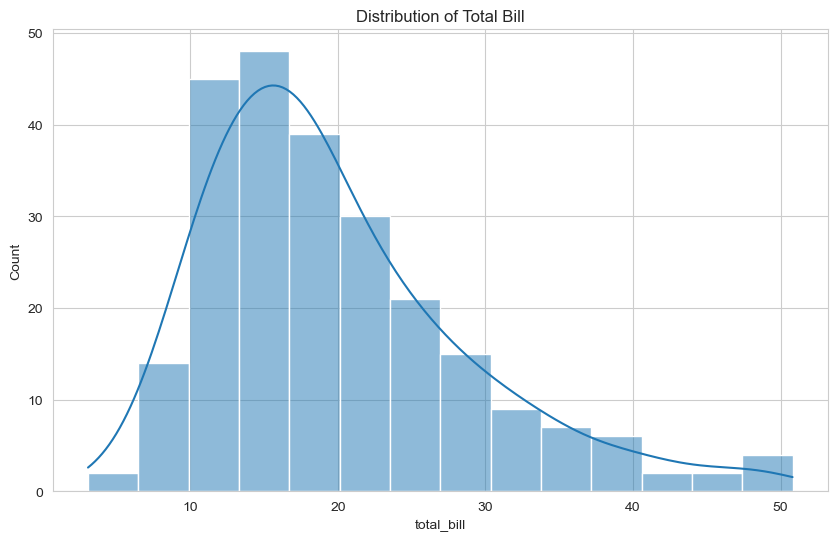

In [40]:
print('Histogram of total bill:')
sns.histplot(data=tips, x='total_bill', kde=True)

plt.title('Distribution of Total Bill');

Box plot of total bill by day:


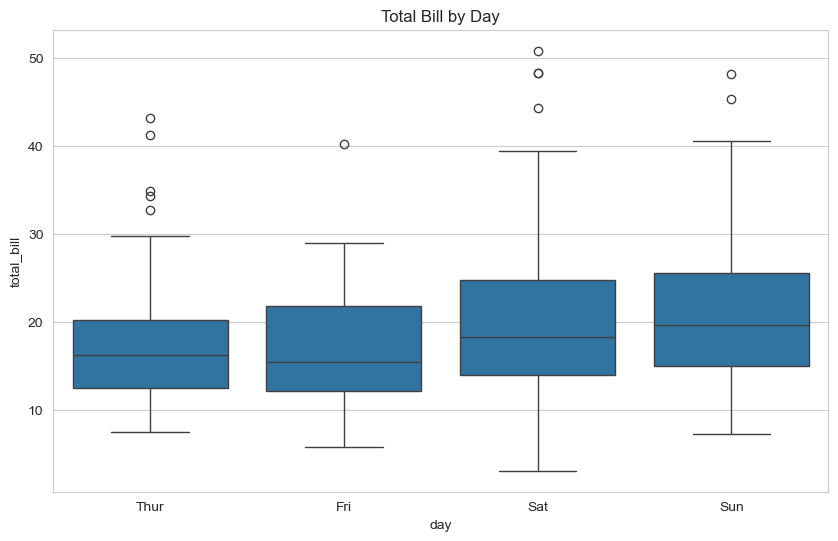

In [41]:
print('Box plot of total bill by day:')
sns.boxplot(data=tips, x='day', y='total_bill')

plt.title('Total Bill by Day');

Scatter plot of tip vs total bill colored by time:


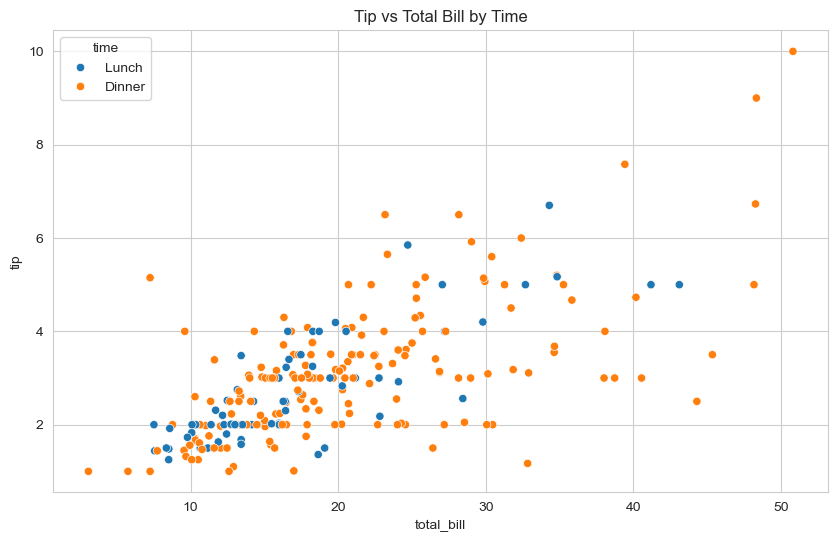

In [42]:
print('Scatter plot of tip vs total bill colored by time:')
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')

plt.title('Tip vs Total Bill by Time');

#### 3.2.2 Trực quan hóa nâng cao với Seaborn

Có thể vẽ nhiều đồ thị trên cùng một hình để so sánh. Dưới đây là một số ví dụ:


--- Statistical Plots with Seaborn ---


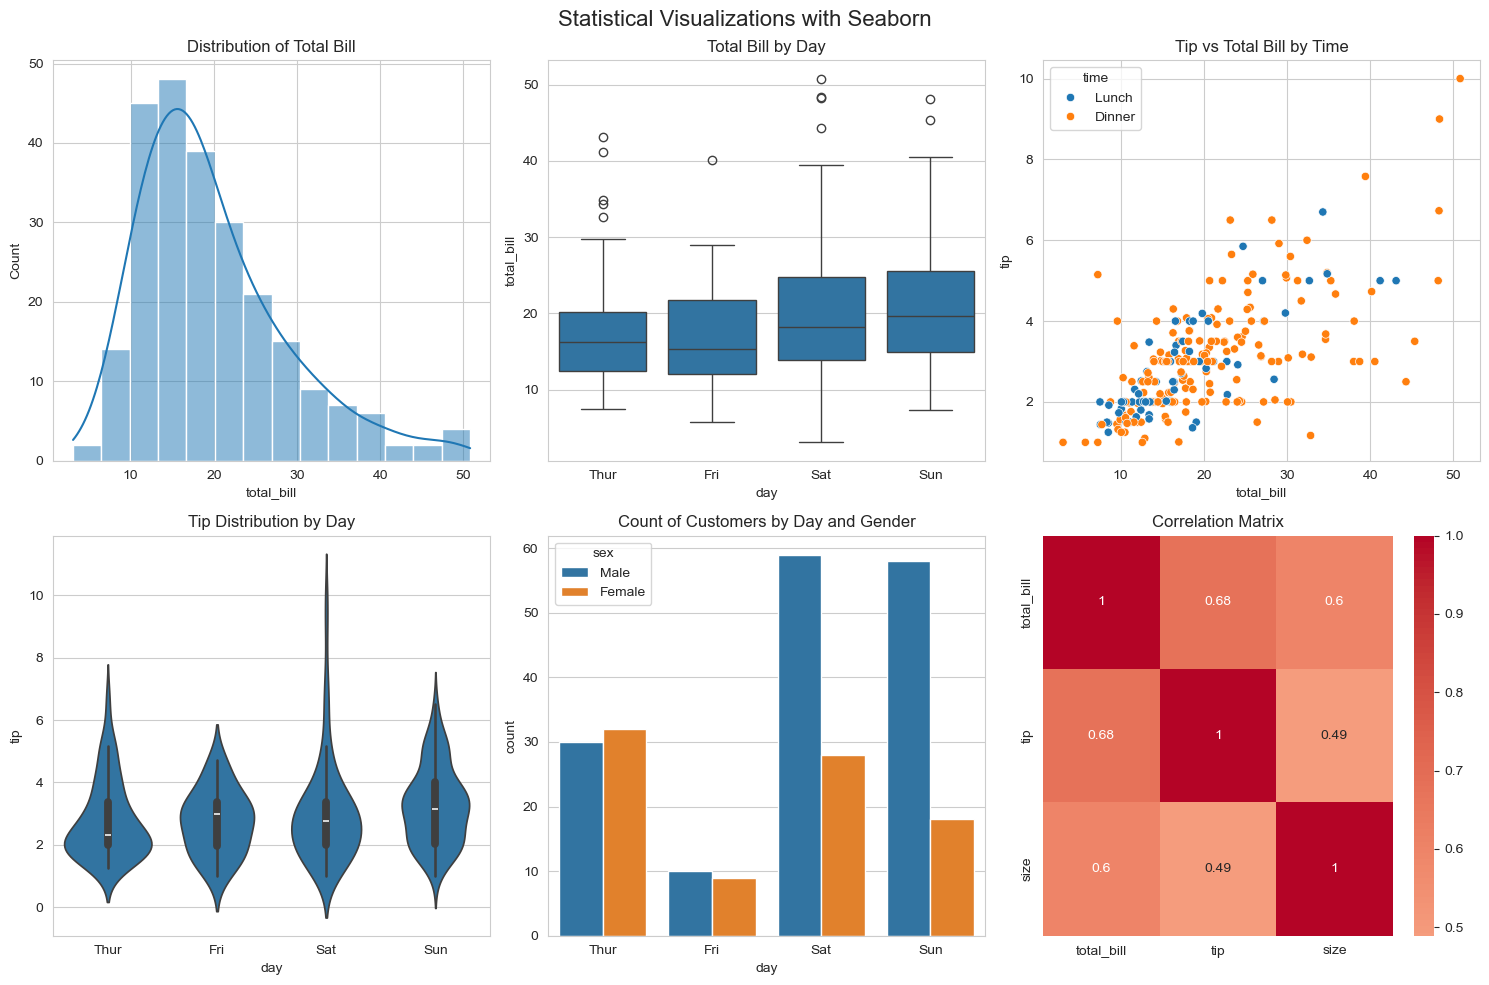

In [46]:
# 3.3 Statistical Plots with Seaborn
print("\n--- Statistical Plots with Seaborn ---")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Statistical Visualizations with Seaborn', fontsize=16)

# 1. Histogram
sns.histplot(data=tips, x='total_bill', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Total Bill')

# 2. Box plot
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[0, 1])
axes[0, 1].set_title('Total Bill by Day')

# 3. Scatter plot
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', ax=axes[0, 2])
axes[0, 2].set_title('Tip vs Total Bill by Time')

# 4. Violin plot
sns.violinplot(data=tips, x='day', y='tip', ax=axes[1, 0])
axes[1, 0].set_title('Tip Distribution by Day')

# 5. Count plot
sns.countplot(data=tips, x='day', hue='sex', ax=axes[1, 1])
axes[1, 1].set_title('Count of Customers by Day and Gender')

# 6. Heatmap of correlations
numeric_tips = tips.select_dtypes(include=[np.number])
correlation_matrix = numeric_tips.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 2])
axes[1, 2].set_title('Correlation Matrix')

plt.tight_layout()
plt.show();



=== Pair Plot for Relationship Exploration ===


<Figure size 1000x800 with 0 Axes>

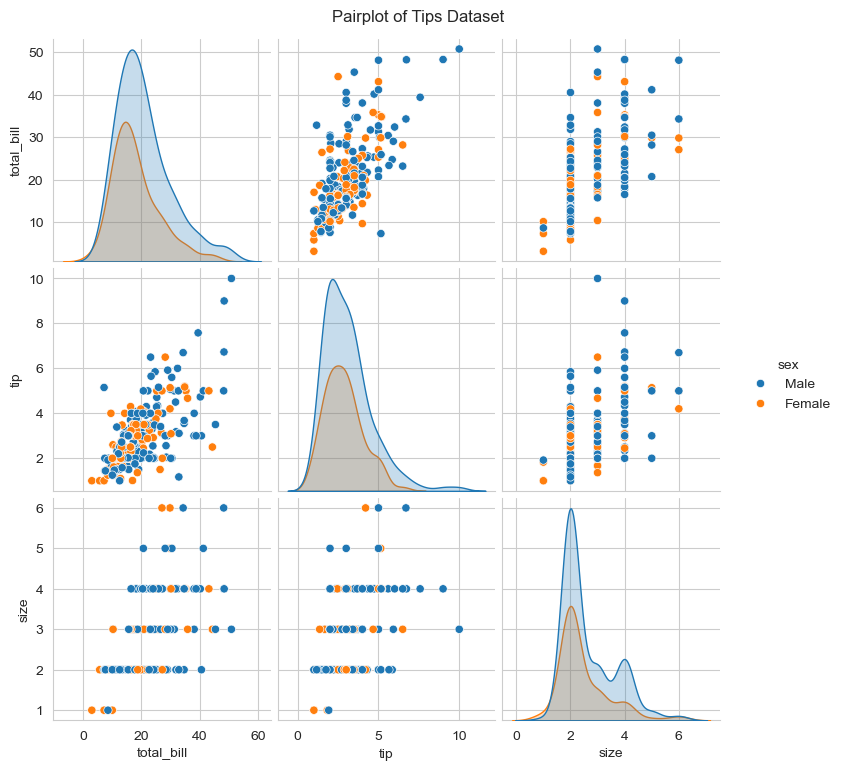

In [53]:
# Pair plot for exploring relationships
print("=== Pair Plot for Relationship Exploration ===")
plt.figure(figsize=(10, 8))
sns.pairplot(tips, hue='sex', diag_kind='kde')
plt.suptitle('Pairplot of Tips Dataset', y=1.02)
plt.show();



=== Distribution Comparisons ===


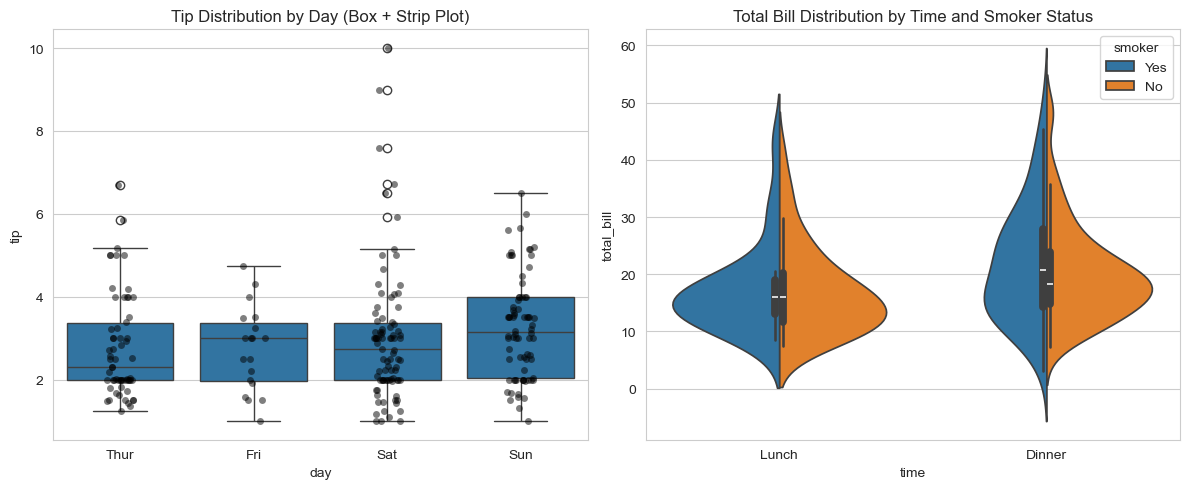

In [54]:
# Distribution comparison
print("\n=== Distribution Comparisons ===")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Compare tip distributions by day
sns.boxplot(data=tips, x='day', y='tip', ax=axes[0])
sns.stripplot(data=tips, x='day', y='tip', color='black', alpha=0.5, ax=axes[0])
axes[0].set_title('Tip Distribution by Day (Box + Strip Plot)')

# Compare bill distributions by time and smoker status
sns.violinplot(data=tips, x='time', y='total_bill', hue='smoker', split=True, ax=axes[1])
axes[1].set_title('Total Bill Distribution by Time and Smoker Status')

plt.tight_layout()
plt.show();



## 4. LUYỆN TẬP

Thông tin các bộ dữ liệu:

- `car-sales.csv`: bộ dữ liệu chứa thông tin của các ôtô cũ ở một cửa hàng


### 1. Đọc dữ liệu

In [ ]:
# YOUR CODE HERE

### 2. Dữ liệu có bao nhiêu dòng, bao nhiêu cột

Đáp án: (10 dòng, 5 cột)

In [ ]:
# YOUR CODE HERE

### 3. Theo bạn  thuộc tính nào là thuộc tính định tính, thuộc tính nào là thuộc tính định lượng?

_(không cần viết code)_

***Your answer here:***

### 4. Trong dữ liệu có thông tin của bao nhiêu xe?

Đáp án: 10 xe

In [ ]:
# YOUR CODE HERE

### 5. Đếm số xe theo theo hãng

Đáp án: Toyota: 10 xe, Honda: 3 xe, Nissan: 2 xe, BMW: 1 xe

In [ ]:
# YOUR CODE HERE

### 6. Đếm số xe theo màu


In [ ]:
# YOUR CODE HERE

### 7. Tổng giá trị các xe trong cửa hàng

Đáp án: 76450 USD


In [ ]:
# YOUR CODE HERE

### 8. Top 3 xe có giá cao nhất


In [ ]:
# YOUR CODE HERE

### 9. Khảo sát xe của hãng Honda

- Tính tỷ lệ xe Honda trong dữ liệu của cửa hàng (0.3)
- Cho biết giá trung bình của xe hãng Honda của cửa hàng (6500)
- Cho biết các xe của hãng Honda trong cửa hàng có những màu sắc nào (Red, Blue)

In [ ]:
# YOUR CODE HERE

### 10. Tính toán các giá trị sau của  thuộc tính giá ('Price')

- Giá trung bình các xe (7645)
- Giá trị trung vị các xe (6625)
- Miền giá trị của xe (18500)
- Miền phân vị của xe (2750)
- Điểm phân vị 0.4 và 0.6 của giá ([5750, 7000])

In [ ]:
# YOUR CODE HERE

11. Vẽ đồ thị histogram của tổng hoá đơn


In [ ]:
# YOUR CODE HERE

12. Vẽ đồ thị boxplot của tổng hoá đơn

In [ ]:
# YOUR CODE HERE

13. Vẽ đồ thị thể hiện tổng tiền tip theo ngày


In [ ]:
# YOUR CODE HERE

14. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.

In [ ]:
# YOUR CODE HERE

15. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

In [ ]:
# YOUR CODE HERE

---

## TÓM TẮT

Trong nội dung tài liệu này, chúng ta đã làm quen với:
- Cách sử dụng Pandas để đọc, xử lý và tóm tắt dữ liệu
- Cách sử dụng Seaborn để trực quan hóa dữ liệu
- Các hàm thống kê cơ bản trong Pandas



---
## THAM KHẢO

Tài liệu sẽ hướng dẫn các chủ đề cần thiết để phục vụ môn học, nếu có nhu cầu tìm hiểu và học thêm các bạn có thể tham khảo từ các nguồn sau:

- [Pandas Documentation](https://pandas.pydata.org/docs/index.html)
- [W3School Pandas](https://www.w3schools.com/python/pandas/default.asp)
- [Seaborn Docementation](https://seaborn.pydata.org/)  (beautiful documentation)

---

## CHANGELOG

- 20250831 : add new version (pandas, seaborn)



---